<a href="https://colab.research.google.com/github/LeonardoGoncRibeiro/Others/blob/main/01_CreditScore.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Machine Learning: Credit Scoring

In this course, we will understand how granting credit works from the point of view of a Data Scientist. We will understand the particularities of applying Machine Learning techniques in the financial market, and we will learn to analysis a dataset for credit concession. Then, we will develop and validate a credit scoring model.

The credit chain has four main pilars:

*   Prospection
*   Concession
*   Risk management
*   Recovering

In this course, we will focus on the second pilar. Also, in the market, we have two different people: savers and takers. While the former saves more money, the latter tends to take more money. The financial institution should be able to recognize these people, and intermediate their relationship. Usually, a saver *saves* money in a financial institution, gets payed by this saving, and the financial institution *borrows* money for takers.  

The financial institution sets *how much* the saver is going to make, as well as *how much* the taker has to pay, and *if the taker is able to receive more credit*. 

Usually, a taker will ask for credit on a financial institution. Then, this financial institution we use a decision model (**Credit Scoring**) to understand if credit should be *approved* or *not approved*.  

## Credit scoring

Credit scoring estimates the probability of a given event occuring in a given dataset. While grating credit, we should get the probability that a given takers **does not pay his debt**.

Every credit granting is related to a risk of not getting paid. Also, the credit risk is related to the taxes used, and, the higher the risk of default, the higher the tax.

Credit scoring is a **multivariate model** to evaluate the probability of default. The variables of this model is the information given by the taker, which allows the financial institution to evaluate the risk of credit. Different classification models can be used to that end, such as logistic regression, random forest, naive bayes, support vector machines, and others.

In this course, we will use the logistic regression to build our credit scoring model.

# Importing our dataset

Here, we will use a dataset from UCI:

In [337]:
import pandas as pd

df = pd.read_csv('https://raw.githubusercontent.com/alura-cursos/credit_scoring/main/base_dados_traduzida.csv')

In [338]:
df.head( )

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,< 0 DM,6,critical account/ other credits existing (not ...,domestic appliances,1169,unknown/ no savings account,.. >= 7 years,4,male : single,...,4,real estate,67,none,own,2,skilled employee / official,1,"yes, registered under the customers name",yes
1,1,0 <= ... < 200 DM,48,existing credits paid back duly till now,domestic appliances,5951,... < 100 DM,1 <= ... < 4 years,2,female : divorced/separated/married,...,2,real estate,22,none,own,1,skilled employee / official,1,none,yes
2,0,no checking account,12,critical account/ other credits existing (not ...,(vacation - does not exist?),2096,... < 100 DM,4 <= ... < 7 years,2,male : single,...,3,real estate,49,none,own,1,unskilled - resident,2,none,yes
3,0,< 0 DM,42,existing credits paid back duly till now,radio/television,7882,... < 100 DM,4 <= ... < 7 years,2,male : single,...,4,if not A121 : building society savings agreeme...,45,none,for free,1,skilled employee / official,2,none,yes
4,1,< 0 DM,24,delay in paying off in the past,car (new),4870,... < 100 DM,1 <= ... < 4 years,3,male : single,...,4,unknown / no property,53,none,for free,2,skilled employee / official,2,none,yes


In our dataset, we have 21 features. The first (default) is the target value. The others:

**Attribute 1: (qualitative) Status of existing checking account**

**Attribute 2: (numerical) Duration in month**

**Attribute 3: (qualitative) Credit history**

**Attribute 4: (qualitative) Purpose**

**Attribute 5: (numerical) Credit amount****

**Attibute 6: (qualitative) Savings account/bonds**

**Attribute 7: (qualitative) Present employment since**

**Attribute 8: (numerical) Installment rate in percentage of disposable income**

**Attribute 9: (qualitative) Personal status and sex**

**Attribute 10: (qualitative) Other debtors / guarantors**

**Attribute 11: (numerical) Present residence since**

**Attribute 12: (qualitative) Property**

**Attribute 13: (numerical) Age in years**

**Attribute 14: (qualitative) Other installment plans**

**Attribute 15: (qualitative) Housing**

**Attribute 16: (numerical) Number of existing credits at this bank**

**Attribute 17: (qualitative) Job**

**Attribute 18: (numerical) Number of people being liable to provide maintenance for**

**Attribute 19: (qualitative) Telephone**

**Attribute 20: (qualitative) foreign worker**


Let's see if we have any null values:

In [339]:
df.info( )

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   default                      1000 non-null   int64 
 1   conta_corrente               1000 non-null   object
 2   prazo_emprestimo_meses       1000 non-null   int64 
 3   historico_credito            1000 non-null   object
 4   proposito_emprestimo         1000 non-null   object
 5   valor_emprestimo             1000 non-null   int64 
 6   reserva_cc                   1000 non-null   object
 7   tempo_emprego_atual          1000 non-null   object
 8   taxa_comp_salario            1000 non-null   int64 
 9   sexo_est_civil               1000 non-null   object
 10  outros_fiadores              1000 non-null   object
 11  anos_residencia_atual        1000 non-null   int64 
 12  propriedade                  1000 non-null   object
 13  idade                        1000 

In [340]:
df.isnull( ).sum( )

default                        0
conta_corrente                 0
prazo_emprestimo_meses         0
historico_credito              0
proposito_emprestimo           0
valor_emprestimo               0
reserva_cc                     0
tempo_emprego_atual            0
taxa_comp_salario              0
sexo_est_civil                 0
outros_fiadores                0
anos_residencia_atual          0
propriedade                    0
idade                          0
outros_planos_financiamento    0
tipo_residencia                0
n_creditos_banco               0
status_emprego                 0
n_dependentes                  0
telefone                       0
trabalhador_estrangeiro        0
dtype: int64

It seems that we have 1000 entries in our dataset, and there is no missing value. Let's see if we have any duplicated data:

In [341]:
df.duplicated( ).sum( )

0

# First credit score model

Here, we will build our first credit score model: a logistic regression. One of its main premises is that we have a binary target feature (*default*), and independent features. First, let's use a label encoder to handle the categorical variables. We could automate the process using the LabelEncoder from sci-kit learn package. However, since most of our features have a hierarchy, that could make our model uncapable of performing good predictions. So, let's do these first by hand:

In [342]:
map_list = {'no checking account' : 0, '< 0 DM' : 1, '0 <= ... < 200 DM' : 2, '>= 200 DM / salary assignments for at least 1 year' : 3}
df['conta_corrente'] = df['conta_corrente'].map(map_list)

In [343]:
map_list = {'critical account/ other credits existing (not at this bank)' : 0, 
            'delay in paying off in the past' : 1,
            'existing credits paid back duly till now' : 2,
            'all credits at this bank paid back duly' : 3,
            'no credits taken/ all credits paid back duly' : 4}
df['historico_credito'] = df['historico_credito'].map(map_list)

In [344]:
map_list = {'unknown/ no savings account' : 0, 
            '... < 100 DM' : 1,
            '100 <= ... < 500 DM' : 2,
            '500 <= ... < 1000 DM ' : 3,
            '.. >= 1000 DM ' : 4}
df['reserva_cc'] = df['reserva_cc'].map(map_list)

In [345]:
map_list = {'unemployed' : 0, 
            '... < 1 year ' : 1,
            '1 <= ... < 4 years' : 2,
            '4 <= ... < 7 years' : 3,
            '.. >= 7 years' : 4}
df['tempo_emprego_atual'] = df['tempo_emprego_atual'].map(map_list)

In [346]:
map_list = {'none' : 0, 
            'co-applicant' : 1,
            'guarantor' : 2}
df['outros_fiadores'] = df['outros_fiadores'].map(map_list)

In [347]:
map_list = {'none' : 0, 
            'stores' : 1,
            'bank' : 2}
df['outros_planos_financiamento'] = df['outros_planos_financiamento'].map(map_list)

In [348]:
map_list = {'for free' : 0, 
            'rent' : 1,
            'own' : 2}
df['tipo_residencia'] = df['tipo_residencia'].map(map_list)

In [349]:
map_list = {'unemployed/ unskilled - non-resident' : 0, 
            'unskilled - resident' : 1,
            'skilled employee / official' : 2,
            'management/ self-employed/ highly qualified employee/ officer' : 3}
df['status_emprego'] = df['status_emprego'].map(map_list)

For the rest of the labels, since there is no hierarchy, let's use a LabelEncoder:

In [350]:
from sklearn.preprocessing import LabelEncoder

LabEnc = LabelEncoder( )

dict_map = {}

for col in df.columns:
  if df[col].dtype.name == 'object':
    df[col] = LabEnc.fit_transform(df[col])
    keys = LabEnc.classes_
    values = LabEnc.transform(LabEnc.classes_)
    tmp = dict(zip(keys, values))
    dict_map[col] = tmp

Nice! We can see how our label encoder encoded our values by looking at:

In [351]:
for key in dict_map:
  print(key + " : ")
  print(dict_map[key])
  print('-'*300)

proposito_emprestimo : 
{'(vacation - does not exist?)': 0, 'business': 1, 'car (new)': 2, 'car (used)': 3, 'domestic appliances': 4, 'education': 5, 'furniture/equipment': 6, 'radio/television': 7, 'repairs': 8, 'retraining': 9}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
sexo_est_civil : 
{'female : divorced/separated/married': 0, 'male : divorced/separated': 1, 'male : married/widowed': 2, 'male : single': 3}
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
propriedade : 
{'if not A1

Nice! Now, let's separe our targets and our independent features:

In [352]:
y = df.default
X = df.drop('default', axis = 1)

Now, let's perform our train test split:

In [353]:
from sklearn.model_selection import train_test_split

SEED = 77

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

So, 30% of our dataset went to the test set, and 70% wen to the training set. We can check this using:

In [354]:
size_train = X_train.shape[0]
size_test  = X_test.shape[0]

print(f"Train: %s samples" %(size_train))
print(f"Test : %s samples" %(size_test ))

Train: 700 samples
Test : 300 samples


Nice! Everything seems to have worked out. Now, let's use a label encoder to transform our categorical features into numerical values:

In [355]:
df

,default,conta_corrente,prazo_emprestimo_meses,historico_credito,proposito_emprestimo,valor_emprestimo,reserva_cc,tempo_emprego_atual,taxa_comp_salario,sexo_est_civil,...,anos_residencia_atual,propriedade,idade,outros_planos_financiamento,tipo_residencia,n_creditos_banco,status_emprego,n_dependentes,telefone,trabalhador_estrangeiro
0,0,1,6,0,4,1169,0,4,4,3,...,4,2,67,0,2,2,2,1,1,1
1,1,2,48,2,4,5951,1,2,2,0,...,2,2,22,0,2,1,2,1,0,1
2,0,0,12,0,0,2096,1,3,2,3,...,3,2,49,0,2,1,1,2,0,1
3,0,1,42,2,7,7882,1,3,2,3,...,4,0,45,0,0,1,2,2,0,1
4,1,1,24,1,2,4870,1,2,3,3,...,4,3,53,0,0,2,2,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,12,2,7,1736,1,3,3,0,...,4,2,31,0,2,1,1,1,0,1
996,0,1,30,2,3,3857,1,2,4,1,...,4,0,40,0,2,1,3,1,1,1
997,0,0,12,2,4,804,1,4,4,3,...,4,1,38,0,2,1,2,1,0,1
998,1,1,45,2,4,1845,1,2,4,3,...,4,3,23,0,0,1,2,1,1,1


Finally, let's fit our Logistic Regression model:

In [356]:
from sklearn.linear_model import LogisticRegression

model_LogReg = LogisticRegression(max_iter = 1000)
model_LogReg.fit( X_train, y_train )

LogisticRegression(max_iter=1000)

Nice! We have built our first model. Let's get the mean accuracy of our model for our training and test sets:

In [357]:
model_LogReg.score(X_train, y_train)

0.7242857142857143

In [358]:
model_LogReg.score(X_test, y_test)

0.7233333333333334

Our accuracy is $\approx$ 0.72. Note that the accuracy is very similar in both models, which leads us to think that our model is not overfitted to the training data. Note that the accuracy score can also be evaluated using the metrics package from sklearn:

In [359]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, model_LogReg.predict(X_test))

0.7233333333333334

## Evaluating important metrics

The accuracy means that our model was able to hit 73% of our data. However, how much of this was from the defaulted customers? We can understand more on this using other metrics, such as the precision, recall, true positive rate, false positive rate, and others.

These metrics are derived from the confusion matrix. Thus, let's plot the confusion matrix:

In [360]:
import matplotlib.pyplot as plt
from sklearn.metrics import plot_confusion_matrix

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


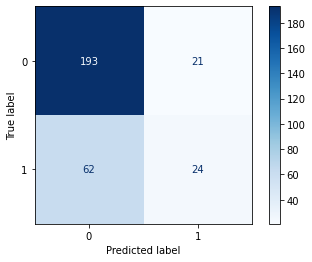

In [361]:
cm = plot_confusion_matrix(model_LogReg, X_test, y_test, cmap = 'Blues', values_format = '.3g')
cm

Nice! So:

*   We got 192 true negatives
*   We got 28 true positives
*   We got 58 false negatives
*   We got 22 false positives



Note that our model is actually very bad at predicting defaulted customers. Most likely, its accuracy was only "kind of" high because most of our dataset is made of non-defaulted customers (non-balanced).

From the confusion matrix, we can also evaluate other metrics. For that end, we can use the classification report:

In [362]:
from sklearn.metrics import classification_report

print(classification_report(y_test, model_LogReg.predict(X_test)))

              precision    recall  f1-score   support

           0       0.76      0.90      0.82       214
           1       0.53      0.28      0.37        86

    accuracy                           0.72       300
   macro avg       0.65      0.59      0.59       300
weighted avg       0.69      0.72      0.69       300



Nice! We can understand these metrics as:



* Precision: Precision evaluates the proportion of TP in  relation to the positive predictions from the model. If we have low precision, it means that there are a lot of non-frauds that our model is identifying as frauds.

\begin{equation}
\dfrac{TP}{TP + FP}
\end{equation}

* Recall: Recall evaluates the proportion of TP and the number of positives from the test set. If we have a lower recall, it means that we are letting many frauds pass.

\begin{equation}
\dfrac{TP}{TP + FN}
\end{equation}

* F1-score: Tries to balance precision and recall. It goes from 0 to 1, and the closest it is to 1, the better.

\begin{equation}
2 \, \dfrac{P \, R}{P + R}
\end{equation}

* Support: Number of cases in each category.

So, note that, considering our category 1 (customers who defaulted), our logistic regression model actually got a recall of 33%, which means that it only found 33% of the people who defaulted. Also, from the predicted defaults, only 56% were correct!

To evaluate our model, we can also plot the ROC curve and evaluate the AUC:

Roc_AUC:  0.744


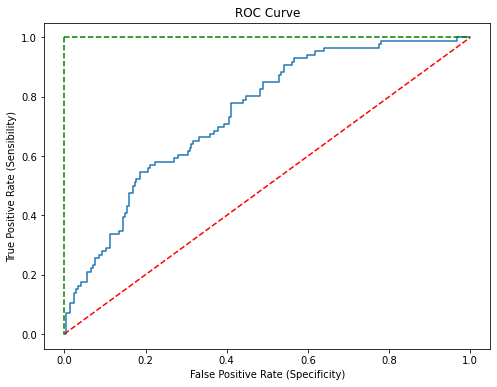

In [363]:
from sklearn.metrics import roc_curve, roc_auc_score

prob_pred = model_LogReg.predict_proba(X_test)[:, 1]

fpr, tpr, threshold = roc_curve(y_test, prob_pred)
print('Roc_AUC: ', round(roc_auc_score(y_test, prob_pred), 3))

plt.subplots(1, figsize = (8, 6))
plt.title('ROC Curve')

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate (Specificity)')
plt.ylabel('True Positive Rate (Sensibility)')

plt.plot([0, 1], ls = '--', c = 'r')
plt.plot([0, 0], [1, 0], ls = '--', c = 'green')
plt.plot([1, 1], ls = '--', c = 'green')

From the ROC curve, we see that our model is very close to the red dashed line, which is related to a dummy random model. Also, our Area Under Curve (AUC) is close to 0.50, related to the dummy random model. To understand the AUC, we can consider that:

*   AUC $< 0.70$: Poor discrimination of our dataset
*   $0.70 <$ AUC $< 0.80$: Acceptable discrimination of our dataset
*   $0.80 <$ AUC $< 0.90$: Excellent discrimination of our dataset
*   $0.90 <$ AUC: Perfect discrimination of our dataset



# Data visualization

We created our first model. However, we noticed that our first model is actually very poor in predicting defaults. We are now going to try to improve upon this initial model. First, let's try to perform some feature engineering. Thus, let's understand more about our dataset.

To get some descriptive statistics in our dataset, we can use:

In [364]:
vars = ['sexo_est_civil', 'idade', 'prazo_emprestimo_meses', 'valor_emprestimo', 'default']

df[vars].describe( )

,sexo_est_civil,idade,prazo_emprestimo_meses,valor_emprestimo,default
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,1.878000,35.546000,20.903000,3271.258000,0.300000
std,1.350904,11.375469,12.058814,2822.736876,0.458487
min,0.000000,19.000000,4.000000,250.000000,0.000000
25%,0.000000,27.000000,12.000000,1365.500000,0.000000
50%,3.000000,33.000000,18.000000,2319.500000,0.000000
75%,3.000000,42.000000,24.000000,3972.250000,1.000000
max,3.000000,75.000000,72.000000,18424.000000,1.000000


So, on average, customers from our dataset have 35.5 years. The youngest person who asked for credit was 19 years old, and the oldest person was 75 years old. On average, the takers ask for 20.9 months of loan, where the maximum is 72 months. The average value is 3271.26.

However, note that it is hard to understand 'sexo_est_civil' and 'default' because these are categorical variables. To understand these variables, we can do other stuff. For instance, let's count the values for 'sexo_est_civil':

In [365]:
df['sexo_est_civil'].value_counts( )

3    548
0    310
2     92
1     50
Name: sexo_est_civil, dtype: int64

where each categoric have the following meaning:

In [366]:
dict_map['sexo_est_civil']

{'female : divorced/separated/married': 0,
 'male : divorced/separated': 1,
 'male : married/widowed': 2,
 'male : single': 3}

Now, let's look at the number of defaults:

In [367]:
df['default'].value_counts( )

0    700
1    300
Name: default, dtype: int64

So, we have 700 on 0, and 300 on 1. So, our dataset is not balanced!

## Distribution of our data

Let's start visualizing our data. First, let's build countplots for some of our features:

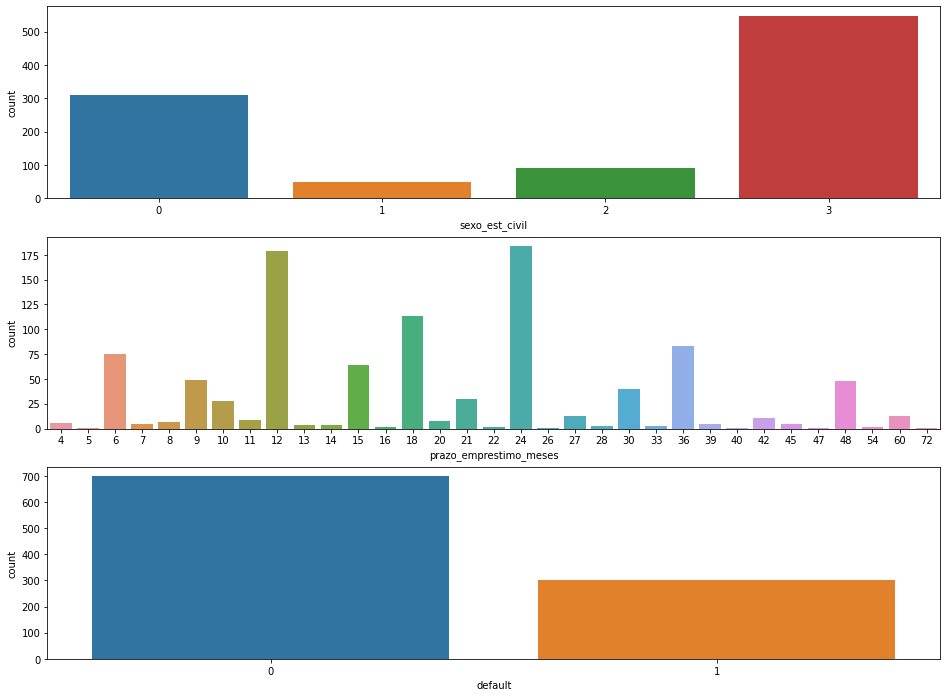

In [368]:
import seaborn as sns

counts = ['sexo_est_civil', 'prazo_emprestimo_meses', 'default']

list_counts = list(enumerate(counts))

plt.figure(figsize = (16, 12))

for i in list_counts:
  plt.subplot(3, 1, i[0] + 1)
  sns.countplot(x = i[1], data = df)

Nice! The countplot is more helpful to visualize categorical data, since numeric data may end up having too much categories. 

Let's now build boxplots for our dataset. First, let's draw a boxplot for the age, and let's separe in groups based on their 'sexo_est_civil':

Text(0.5, 1.0, 'Distribution of Age')

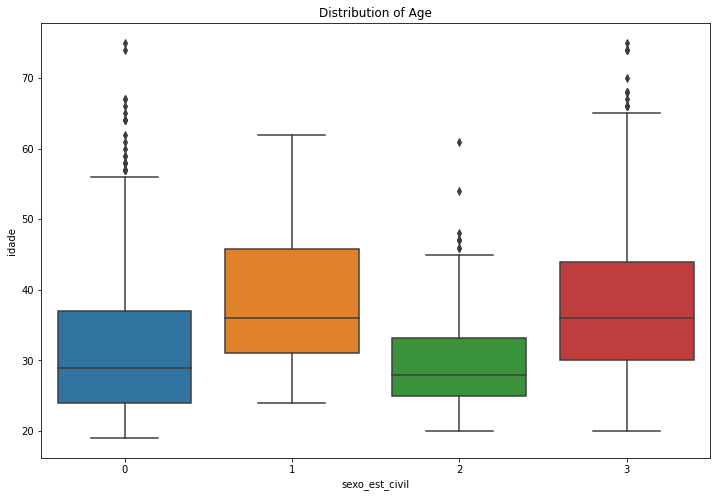

In [369]:
plt.figure(figsize = (12, 8))

sns.boxplot(x = 'sexo_est_civil', y = 'idade', data = df)
plt.title('Distribution of Age')

So, we see that, depending on 'sexo_est_civil', the distribution of the age differs!

Finally, let's understand how does the loan value differs when we increase the loan time:

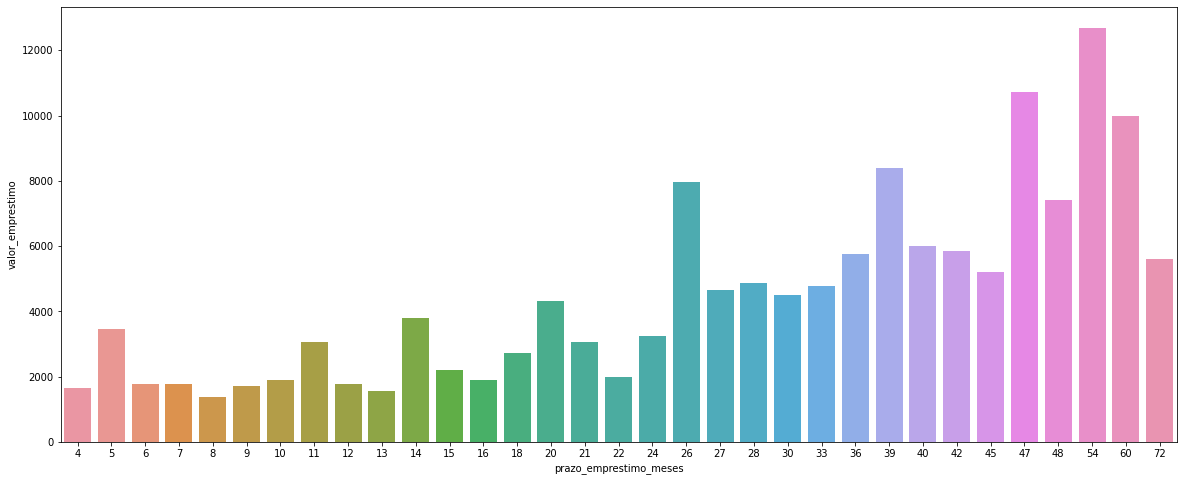

In [370]:
plt.figure(figsize = (20, 8))

sns.barplot(x = 'prazo_emprestimo_meses', y = 'valor_emprestimo', data = df, ci = False)

Note that the value tends to increase (as expected).

## Important: Brazilian regulamentation

According to the Brazilian Central Bank, there are some information that **can't be associated** with the credit scoring model. These are the sensitive information. These are mainly: 

*   Skin color and social origin.
*   Health conditions.
*   Genetic information.
*   Sexual orientation.
*   Political, religious, or philosophical convictions.

Each company may have different credit policies. However, no company can consider these informations in their credit models. 

So, let's change our variable 'sexo_est_civil', and separate it in two other variables. Let's see how this variable was mapped:


In [371]:
dict_map['sexo_est_civil']

{'female : divorced/separated/married': 0,
 'male : divorced/separated': 1,
 'male : married/widowed': 2,
 'male : single': 3}

So, let's create a sex variable:

*   0 : Woman
*   1 : Man

And a civil state:

*   0 : Single
*   1 : Other





In [372]:
df['sex']       = df['sexo_est_civil'].apply(lambda x : 0 if (x == 0) else 1)
df['civ_state'] = df['sexo_est_civil'].apply(lambda x : 0 if (x == 3) else 1)
df.drop('sexo_est_civil', axis = 1, inplace = True)

# Fitting other models

Now, let's try to build other models and see which model better fits our data. First, let's remove some features from our dataset:

In [373]:
dropped_cols = ['sex']

df_att = df.drop(dropped_cols, axis = 1)

Also, let's transform our numeric features into categorical features by considering different bins:

In [374]:
import numpy as np

age = [18, 30, 40, 50, 60, 70, 80]
df_att['age_cat'] = pd.cut(x = df_att['idade'], bins = age, labels = [0, 1, 2, 3, 4, 5])

loan_time = [1, 12, 24, 36, 48, 60, 72]
df_att['loan_time_cat'] = pd.cut(x = df_att['prazo_emprestimo_meses'], bins = loan_time, labels = [0, 1, 2, 3, 4, 5])

loan_value = np.linspace(0, 20000, 21)
df_att['loan_value_cat'] = pd.cut(x = df_att['valor_emprestimo'], bins = loan_value, labels = list(range(20)))

In [375]:
dropped_cols = ['prazo_emprestimo_meses', 'valor_emprestimo', 'idade']

df_att = df_att.drop(dropped_cols, axis = 1)

Ok! Let's separate our features, and create our train and test sets:

In [376]:
y = df_att.default
X = df_att.drop('default', axis = 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.30, random_state = SEED)

Now, let's create a user defined function to fit our models, draw the confusion matrix, and get some important metrics:

In [377]:
def eval_model(X_train, X_test, y_train, y_test, classifier):
  model = classifier
  model.fit(X_train, y_train)

  y_pred = model.predict(X_test)

  prob_pred = model.predict_proba(X_test)[:, 1]

  print(100*'-')
  print(model.__class__.__name__)
  print(100*'-')

  cm = plot_confusion_matrix(model, X_test, y_test, cmap = 'Blues', values_format = '.3g')
  plt.show( );

  print('\nClassification Report:')
  print(classification_report(y_test, y_pred))

  fpr, tpr, threshold = roc_curve(y_test, prob_pred)
  print('Roc_AUC: ', round(roc_auc_score(y_test, prob_pred), 3))

  plt.subplots(1, figsize = (8, 6))
  plt.title('ROC Curve')

  plt.plot(fpr, tpr)
  plt.xlabel('False Positive Rate (Specificity)')
  plt.ylabel('True Positive Rate (Sensibility)')

  plt.plot([0, 1], ls = '--', c = 'r')
  plt.plot([0, 0], [1, 0], ls = '--', c = 'green')
  plt.plot([1, 1], ls = '--', c = 'green')

  return model, cm

Nice! Now, let's define which models we are going to use:

In [378]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

So, let's instance our models:

In [379]:
model_LogRegr = LogisticRegression(max_iter = 1000)
model_DecTree = DecisionTreeClassifier(max_depth = 5)
model_RndFrst = RandomForestClassifier(max_depth = 5, n_estimators = 100)
model_GrdBstg = GradientBoostingClassifier( )

Now, let's run each model:

----------------------------------------------------------------------------------------------------
LogisticRegression
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


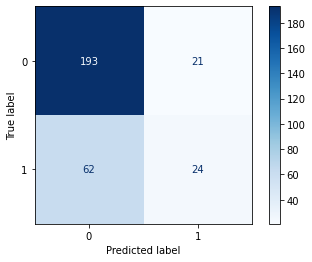


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.90      0.82       214
           1       0.53      0.28      0.37        86

    accuracy                           0.72       300
   macro avg       0.65      0.59      0.59       300
weighted avg       0.69      0.72      0.69       300

Roc_AUC:  0.723


(LogisticRegression(max_iter=1000),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f69977bfb50>)

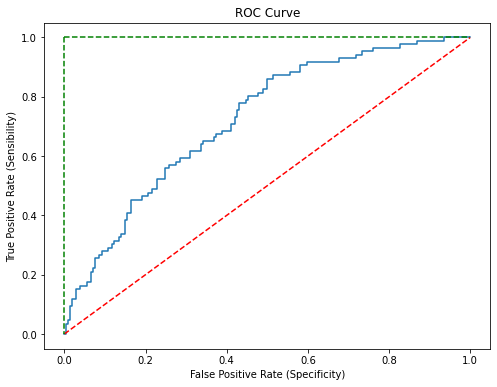

In [380]:
eval_model(X_train, X_test, y_train, y_test, model_LogRegr)

----------------------------------------------------------------------------------------------------
DecisionTreeClassifier
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


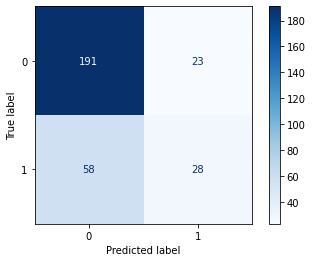


Classification Report:
              precision    recall  f1-score   support

           0       0.77      0.89      0.83       214
           1       0.55      0.33      0.41        86

    accuracy                           0.73       300
   macro avg       0.66      0.61      0.62       300
weighted avg       0.70      0.73      0.71       300

Roc_AUC:  0.721


(DecisionTreeClassifier(max_depth=5),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f6999375410>)

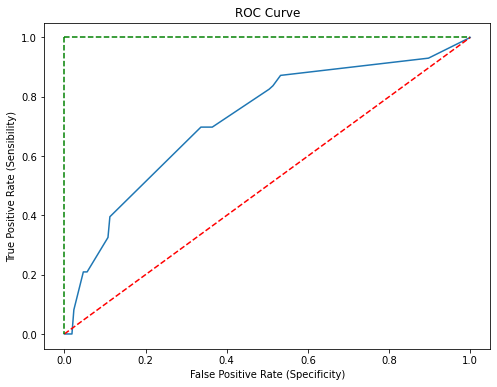

In [381]:
eval_model(X_train, X_test, y_train, y_test, model_DecTree)

----------------------------------------------------------------------------------------------------
RandomForestClassifier
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


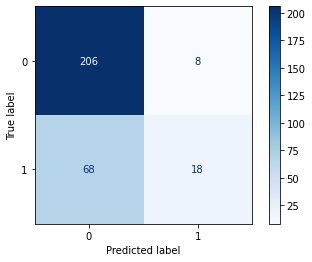


Classification Report:
              precision    recall  f1-score   support

           0       0.75      0.96      0.84       214
           1       0.69      0.21      0.32        86

    accuracy                           0.75       300
   macro avg       0.72      0.59      0.58       300
weighted avg       0.73      0.75      0.69       300

Roc_AUC:  0.792


(RandomForestClassifier(max_depth=5),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f6997c59790>)

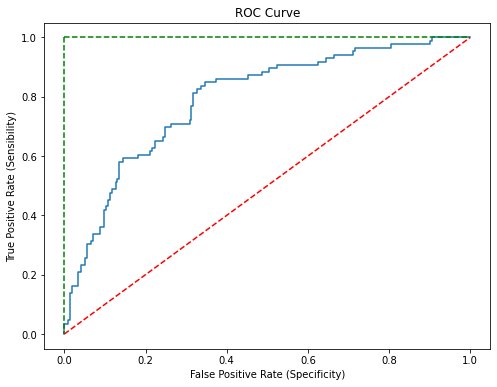

In [382]:
eval_model(X_train, X_test, y_train, y_test, model_RndFrst)

----------------------------------------------------------------------------------------------------
GradientBoostingClassifier
----------------------------------------------------------------------------------------------------


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


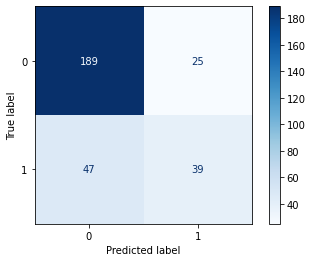


Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.88      0.84       214
           1       0.61      0.45      0.52        86

    accuracy                           0.76       300
   macro avg       0.71      0.67      0.68       300
weighted avg       0.75      0.76      0.75       300

Roc_AUC:  0.776


(GradientBoostingClassifier(),
 <sklearn.metrics._plot.confusion_matrix.ConfusionMatrixDisplay at 0x7f6997d4b7d0>)

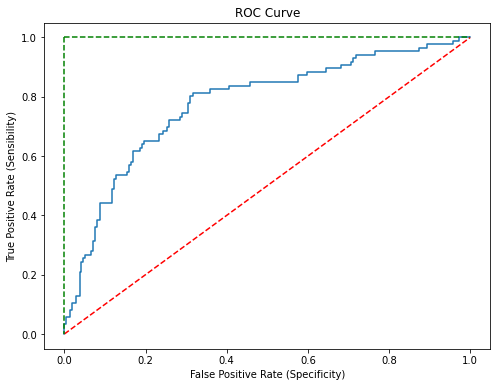

In [383]:
eval_model(X_train, X_test, y_train, y_test, model_GrdBstg)

Note that the change in the models is very minor, and there are trade-offs between each model. 